In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [ ]:
from functools import partial
from phe import summary_data, current_and_previous_data
data, data_date, previous_data, previous_data_date = current_and_previous_data(
    partial(summary_data, (s.new_cases_sum,), None, None)
)

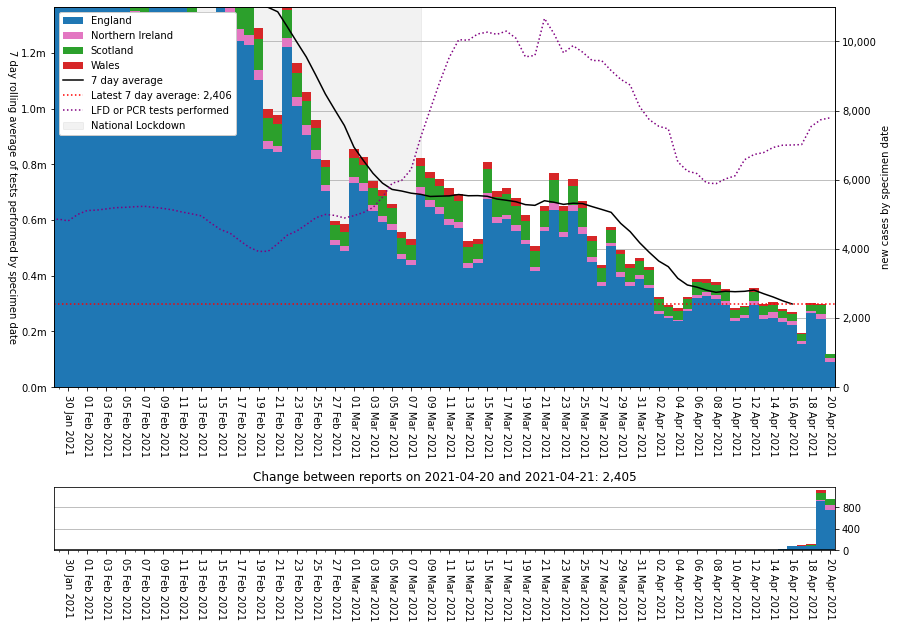

In [2]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

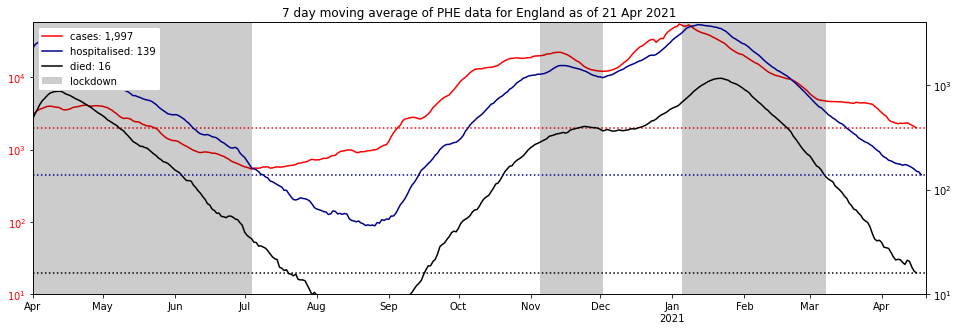

In [3]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

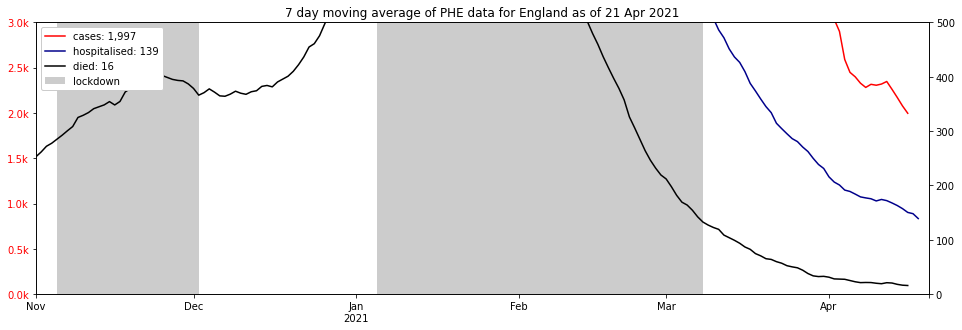

In [19]:
plot_summary(earliest_date='2020-11-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=3_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=500)

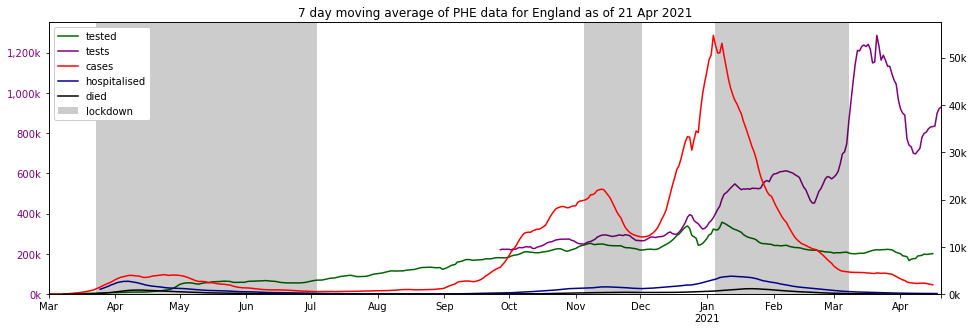

In [5]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

In [6]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,20 Apr 21,"+9,007,092","+27,798,505","+9,007,092","+272,929","+84,871","+272,929"
Northern Ireland,20 Apr 21,"+298,557","+876,290","+298,557","+15,079","+6,948","+15,079"
Scotland,20 Apr 21,"+847,655","+2,752,575","+847,655","+50,388","+2,523","+50,388"
Wales,20 Apr 21,"+622,513","+1,712,372","+622,513","+11,631","+13,280","+11,631"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,9007092.0,27798505.0,18791413.0,56286961,16.002093,33.385020,50.612887
1,Northern Ireland,N92000002,298557.0,876290.0,577733.0,1893667,15.766077,30.508690,53.725233
2,Scotland,S92000003,847655.0,2752575.0,1904920.0,5463300,15.515439,34.867571,49.616990
3,Wales,W92000004,622513.0,1712372.0,1089859.0,3152879,19.744272,34.567105,45.688623


'partial: 33,139,742 (49.6%), full: 10,775,817'

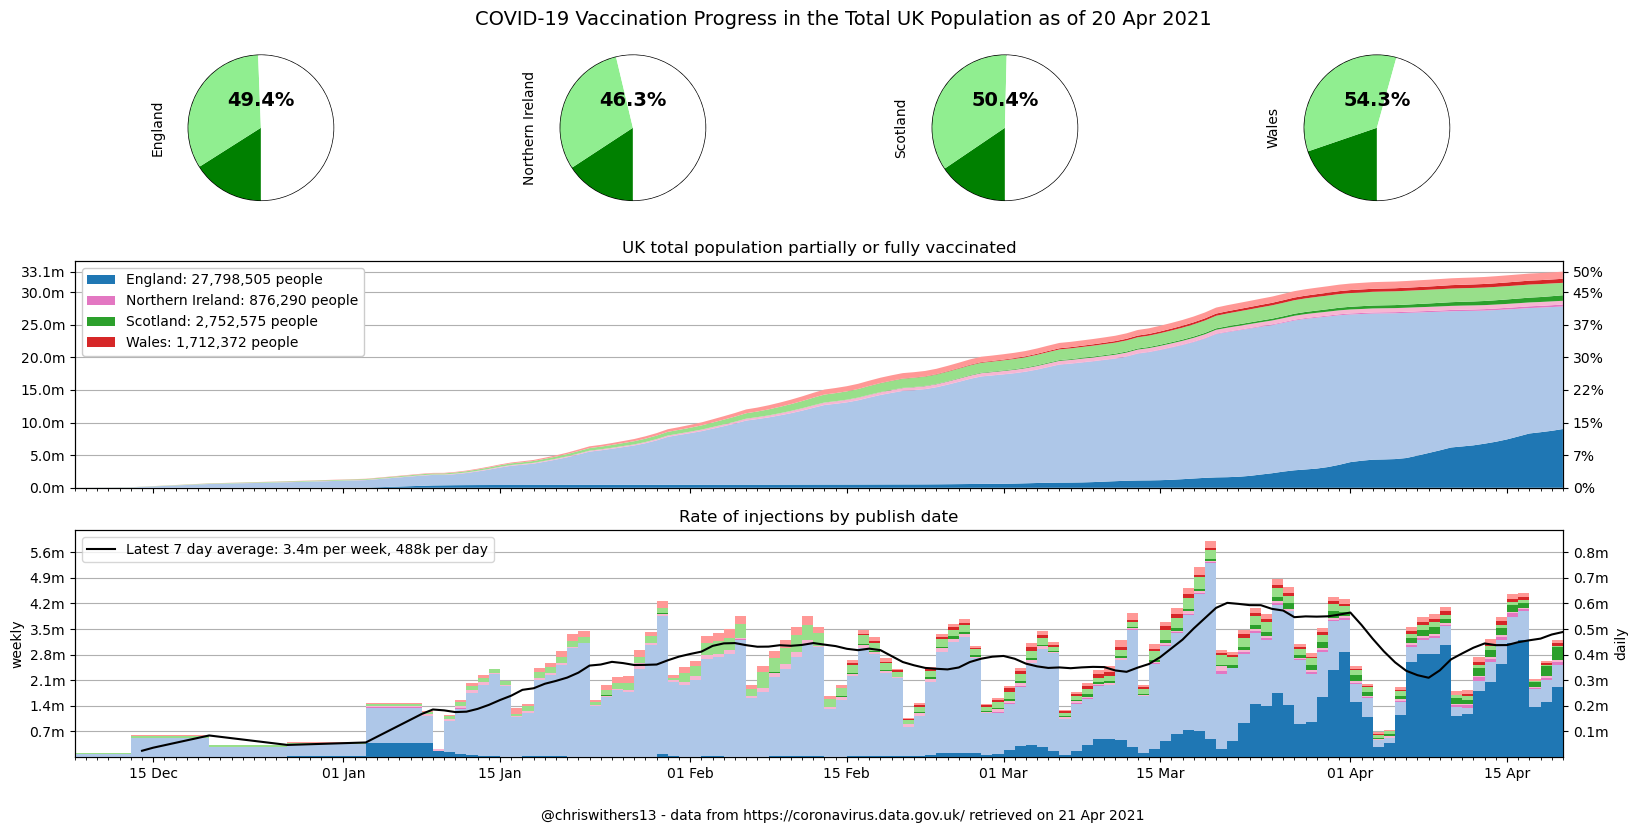

In [7]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

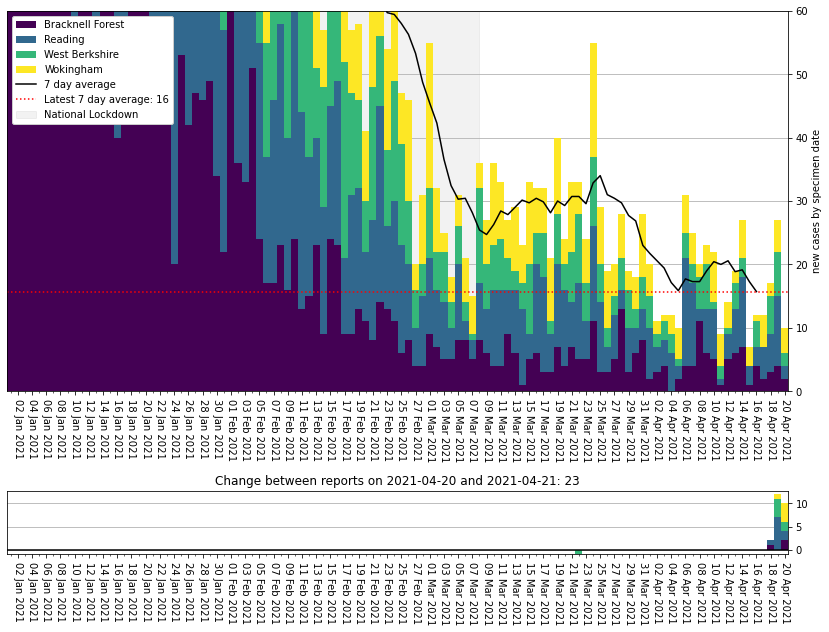

In [8]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=60)

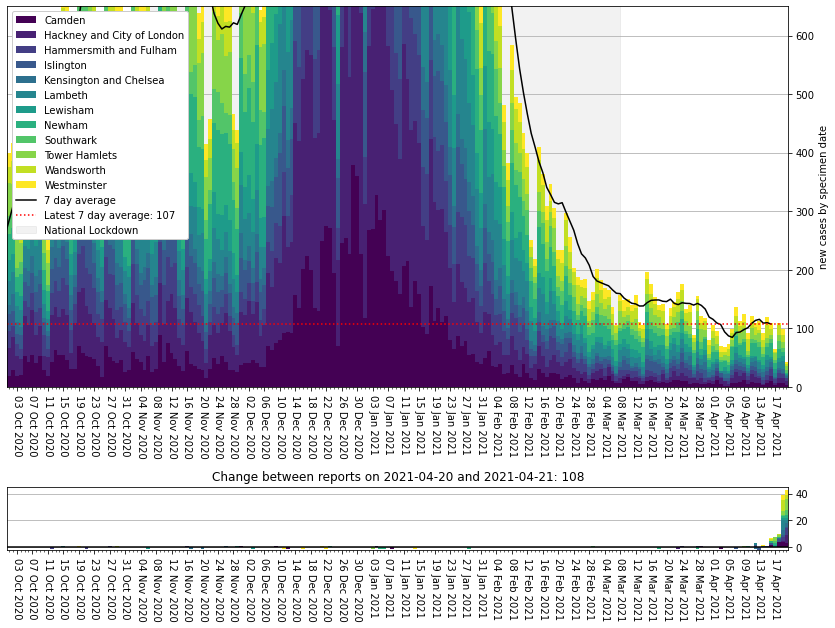

In [9]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
N09000005,Derry City and Strabane,118.320510,179.0,2021-04-20
N09000010,"Newry, Mourne and Down",58.996074,107.0,2021-04-20
E08000017,Doncaster,58.995159,184.0,2021-04-20
S12000005,Clackmannanshire,58.207218,30.0,2021-04-20
S12000050,North Lanarkshire,55.658084,190.0,2021-04-20
N09000009,Mid Ulster,55.208446,82.0,2021-04-20
E06000039,Slough,54.835193,82.0,2021-04-20
E08000034,Kirklees,54.344489,239.0,2021-04-20
E07000169,Selby,54.071949,49.0,2021-04-20


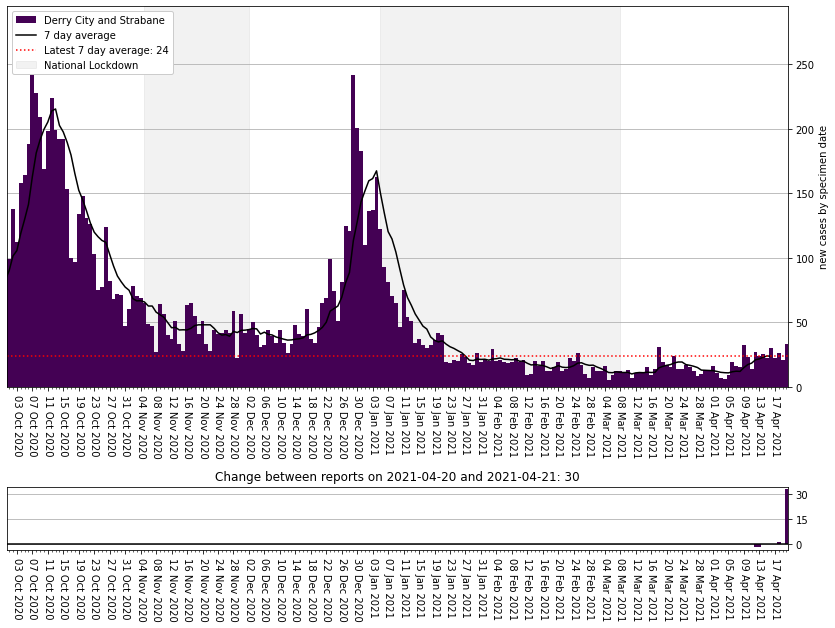

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,40.850343,324.0,2021-04-20
S12000049,Glasgow City,41.066464,260.0,2021-04-20
E08000032,Bradford,47.612343,257.0,2021-04-20
E08000025,Birmingham,21.894946,250.0,2021-04-20
E08000034,Kirklees,54.344489,239.0,2021-04-20
E08000019,Sheffield,39.326121,230.0,2021-04-20
E08000003,Manchester,38.707950,214.0,2021-04-20
S12000050,North Lanarkshire,55.658084,190.0,2021-04-20
E08000017,Doncaster,58.995159,184.0,2021-04-20


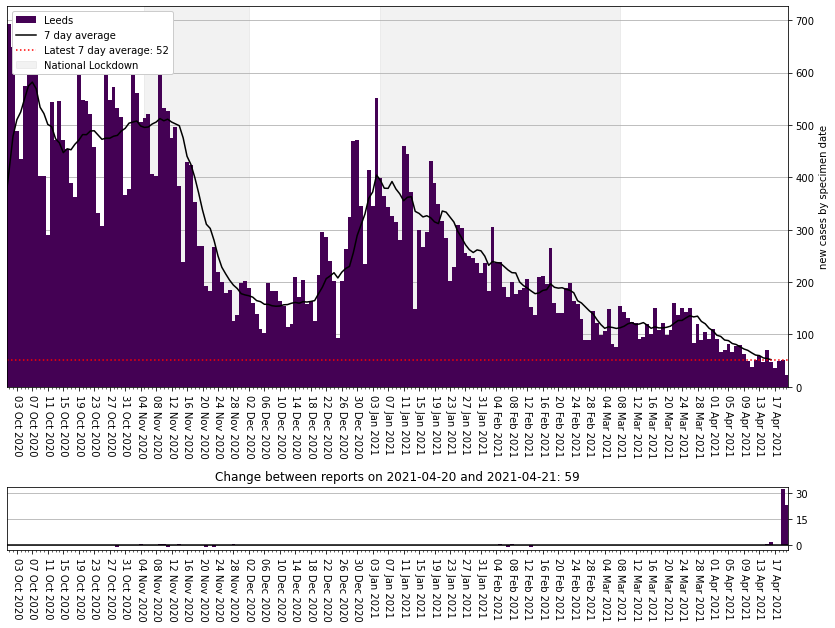

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [15]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.7
phe_max = 0.13

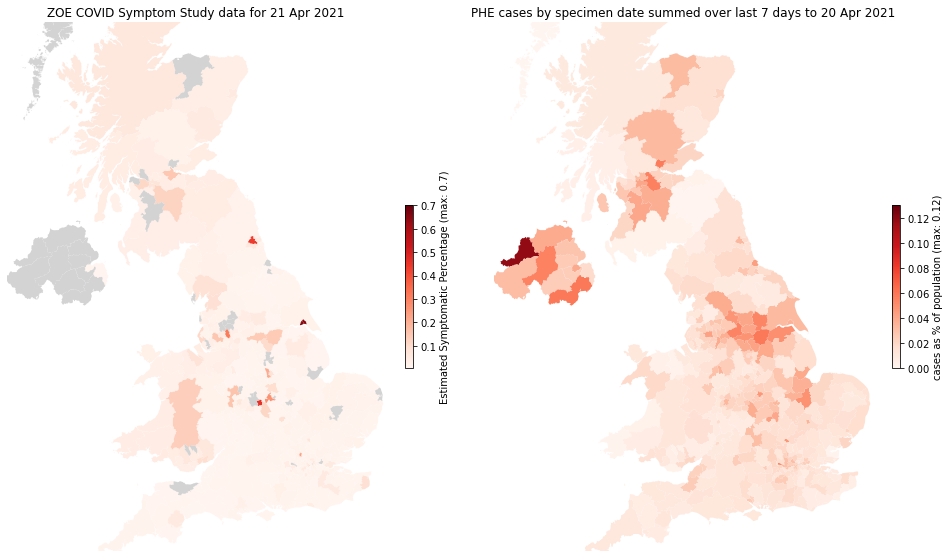

In [16]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [17]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...